In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

import sklearn
import pandas as pd

In [ ]:
dataset = pd.read_csv('breast-cancer-unsupervised-ad.csv')    #Loading the dataset


In [ ]:
X=dataset.iloc[:,:-1].values                 #Dropping the last column that has o and n values
X

array([[2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       [1.142e+01, 2.038e+01, 7.758e+01, ..., 2.575e-01, 6.638e-01,
        1.730e-01],
       ...,
       [1.405e+01, 2.715e+01, 9.138e+01, ..., 1.048e-01, 2.250e-01,
        8.321e-02],
       [1.120e+01, 2.937e+01, 7.067e+01, ..., 0.000e+00, 1.566e-01,
        5.905e-02],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [ ]:
from sklearn.model_selection import train_test_split #Splitting the data into train set(80%) and test set(20%)
X_train, X_test = train_test_split(X)
X_train

array([[1.116e+01, 2.141e+01, 7.095e+01, ..., 4.306e-02, 2.976e-01,
        7.123e-02],
       [1.127e+01, 1.550e+01, 7.338e+01, ..., 8.272e-02, 2.157e-01,
        1.043e-01],
       [1.234e+01, 1.495e+01, 7.829e+01, ..., 4.793e-02, 2.298e-01,
        5.974e-02],
       ...,
       [8.598e+00, 2.098e+01, 5.466e+01, ..., 2.778e-02, 2.972e-01,
        7.712e-02],
       [1.510e+01, 1.639e+01, 9.958e+01, ..., 1.423e-01, 2.590e-01,
        7.779e-02],
       [1.026e+01, 1.658e+01, 6.585e+01, ..., 8.333e-02, 2.691e-01,
        9.479e-02]])

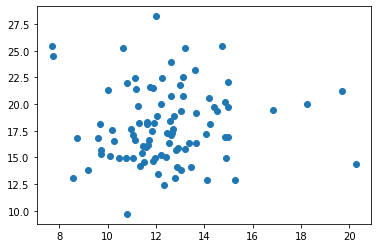

In [ ]:
plt.scatter(X_test[:, 0], X_test[:, 1])      #just visualizing

Using GMM alone



In [ ]:
from sklearn.mixture import GaussianMixture     # Using a 2-Mix GMM
model=GaussianMixture(n_components=2,max_iter=400,init_params='random',covariance_type='full')
model.fit(X_train)

GaussianMixture(covariance_type='full', init_params='random', max_iter=400,
                means_init=None, n_components=2, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [ ]:
pred=model.predict_proba(X_train)
clus=model.predict(X_train) #Gives which cluster a datapoint is likely to go to
clus




array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1])

In [ ]:
log_like=model.score_samples(X_train) #score_samples is a measure of how well the model fits the data. A low score indicates that the model is not able to fit the data well.
                                      #This makes that data point an anomaly.
                                  
log_like.shape


array([ 41.62773419,  38.76208857,  54.7663689 ,  43.06217003,
        60.00968192,  50.26600492,  24.84979785,  55.99256921,
        43.2223328 ,  57.57477202,  39.66665662,  56.21013655,
        44.46773542,  50.65867474,  34.92771545,  52.63507041,
        55.69125503,  47.33605347,  56.21669285,  57.5883659 ,
        54.24386601,  54.93668514,  55.31026189,  55.63719964,
        53.62306827,  45.68238697,  40.69458506,  34.80600419,
        53.38591658,  50.32182264,  45.92060231,  42.61445903,
        51.50314191,  56.59728319,  49.96838817,  57.90532831,
        55.7344295 ,  55.75054294,  41.43376209,  58.97383279,
        48.29954656,  55.68021295,  57.47067298,  45.74172702,
        53.02542129,  33.75466317,  42.81064482,  49.00989615,
        37.36390478,  52.03883015,  54.8668656 ,  43.07561748,
        45.90401234,  56.44422579,  50.58531735,  38.44673154,
        60.11805396,  54.94943275,  58.46811902,  52.01793261,
        55.67743248,  50.79829585,  56.14178231,  51.50

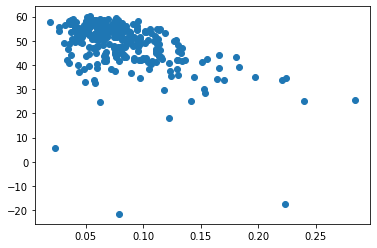

In [ ]:
plt.scatter(X_train[:,5],log_like)   # We could set 25 as the threshold here because values below that dont essentially form 
                                      #the cluster
                                      #Don't worry about X_train[:,5], it was a random pick

Text(0.5, 1.0, ' Plot showing points belonging to cluster 0 or 1')

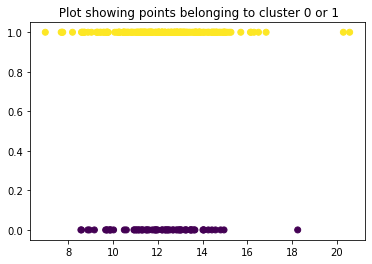

In [182]:
plt.scatter(X_train[:,0],clus ,c=clus)   
plt.title(" Plot showing points belonging to cluster 0 or 1")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


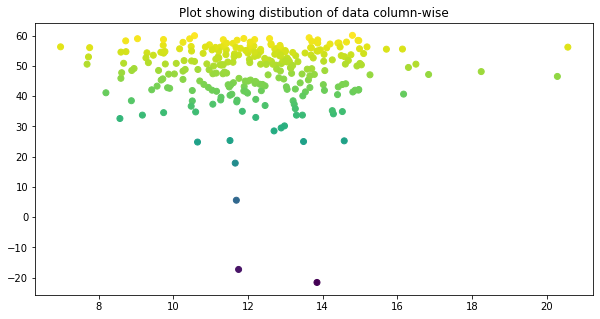

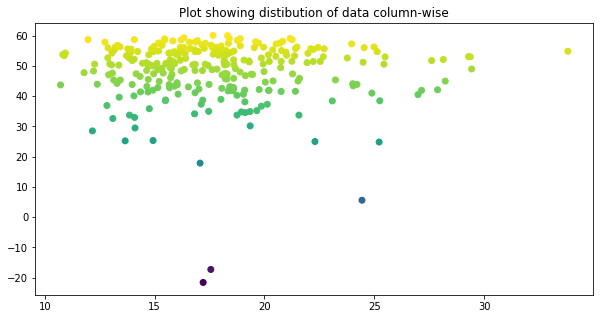

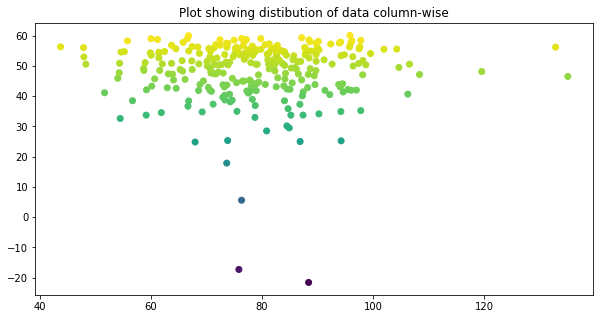

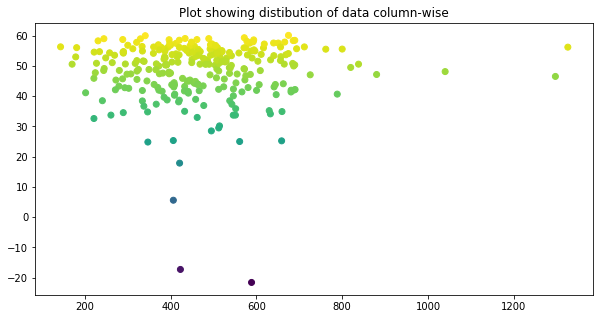

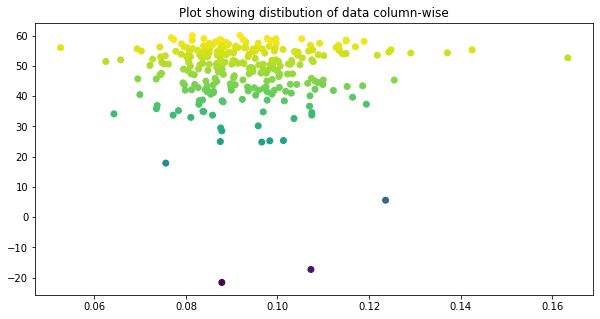

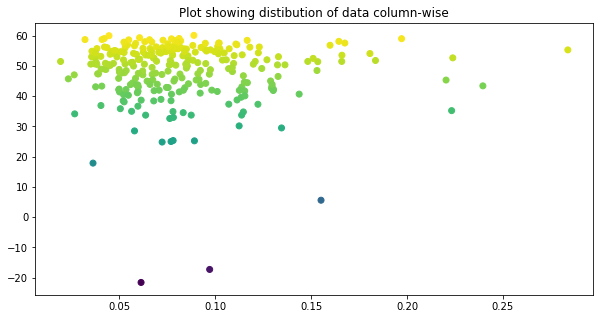

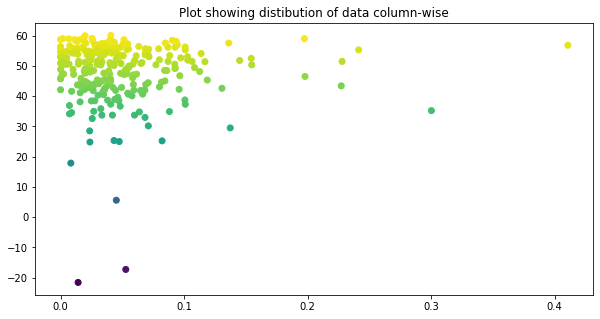

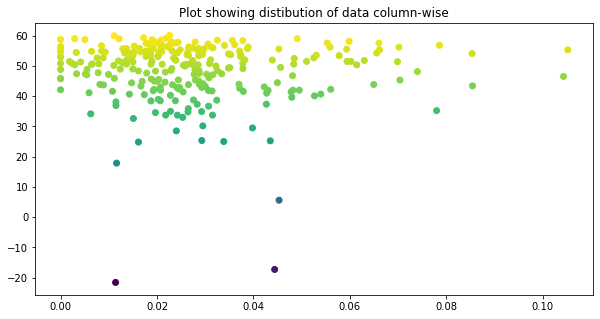

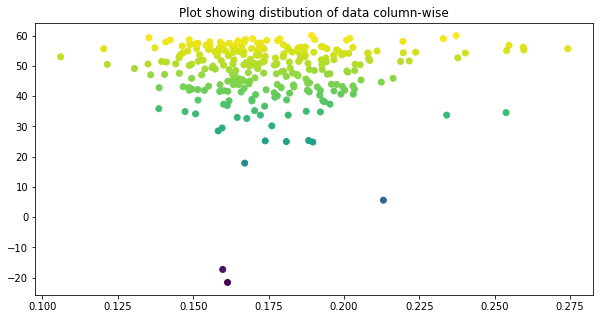

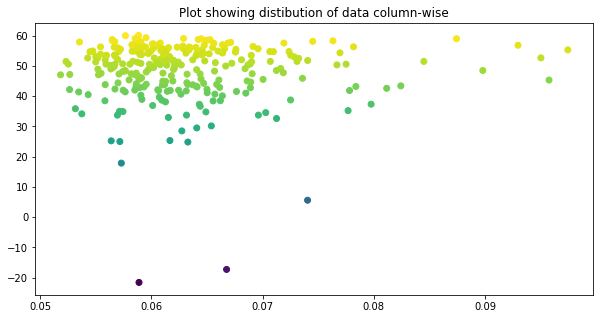

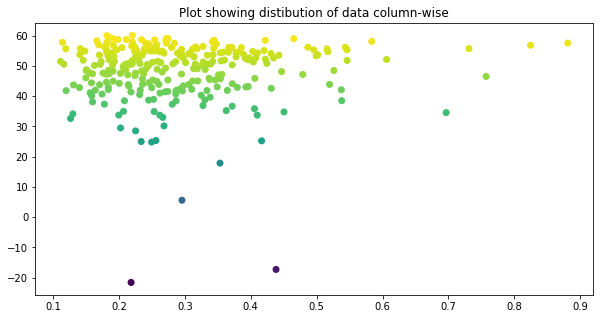

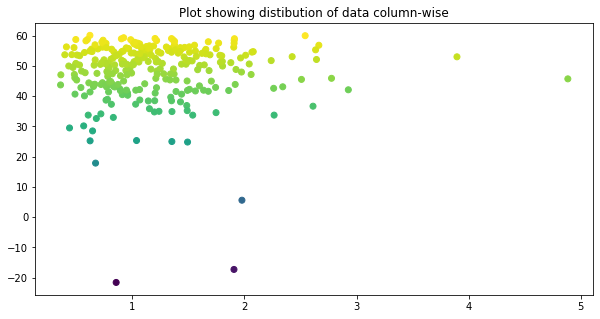

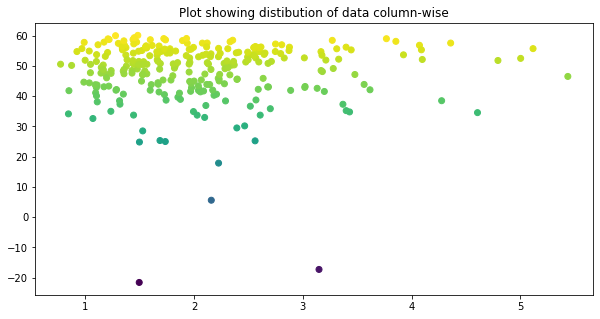

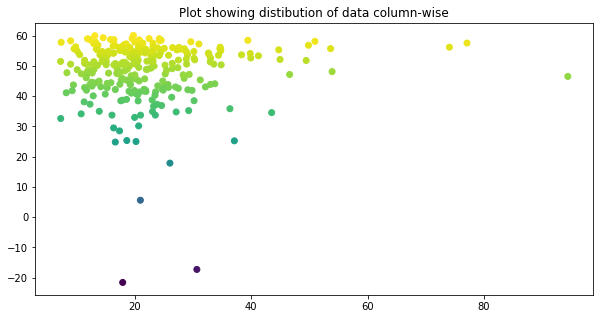

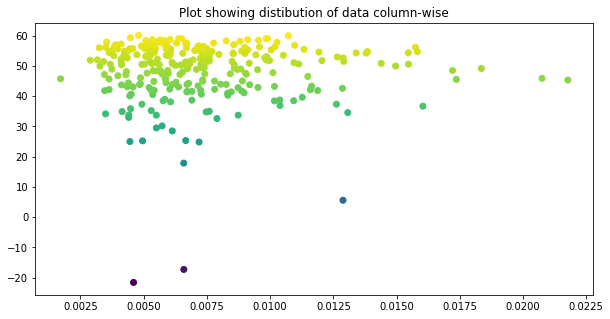

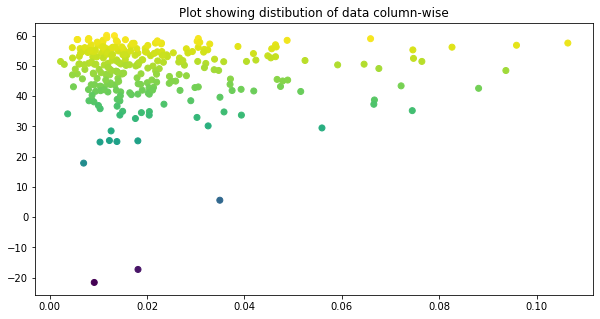

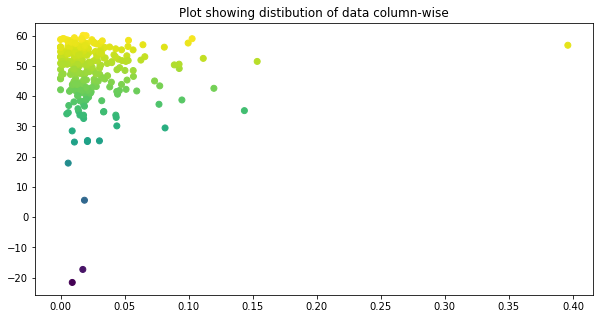

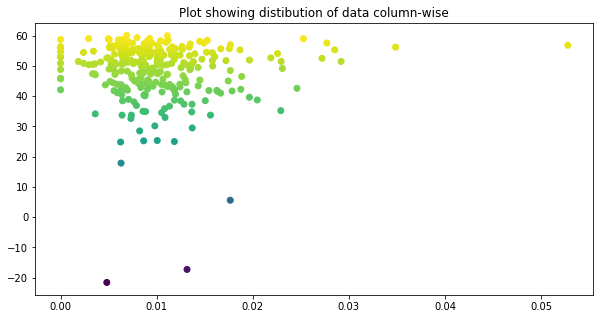

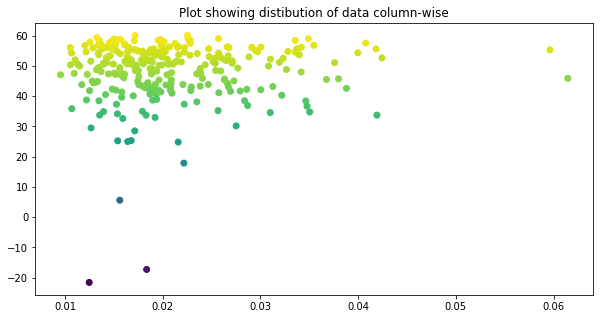

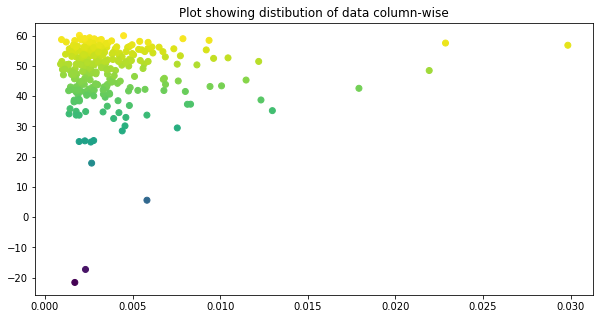

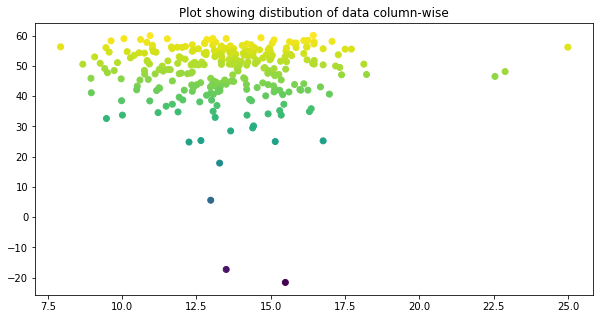

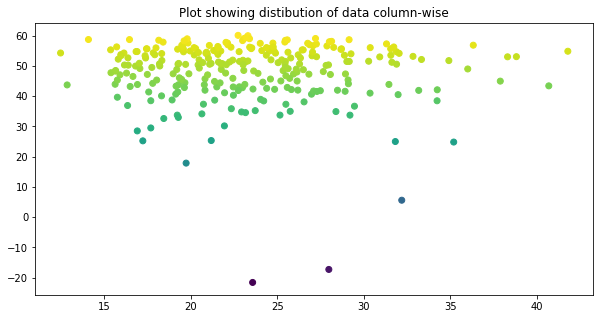

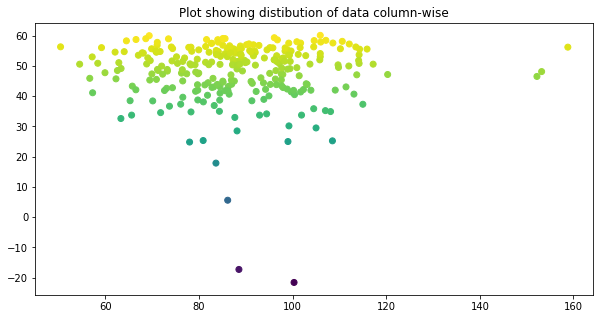

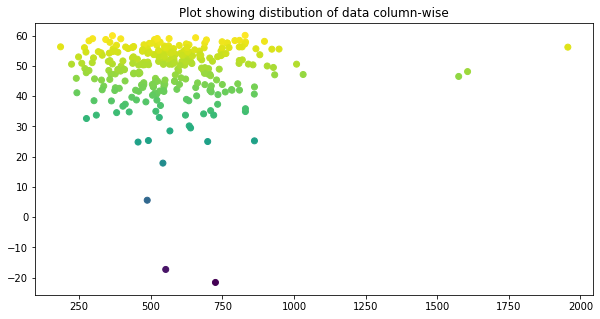

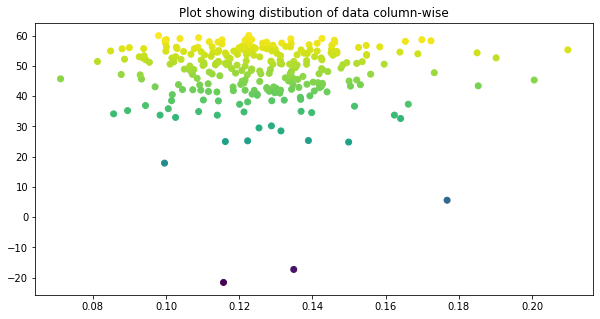

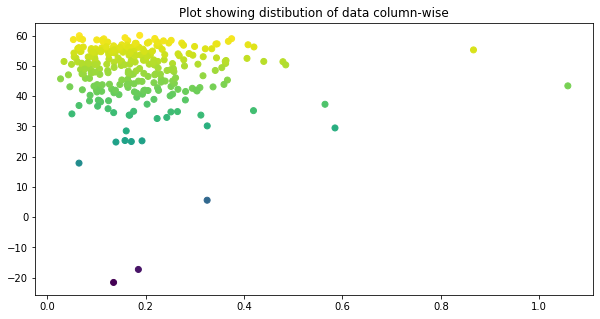

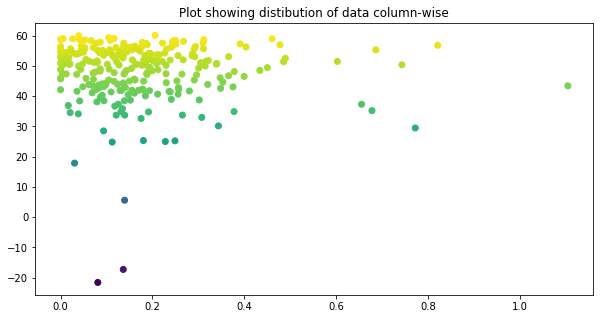

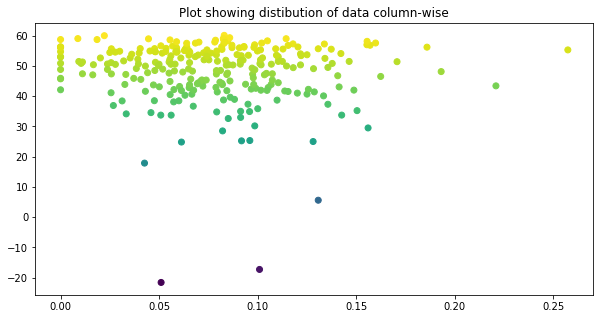

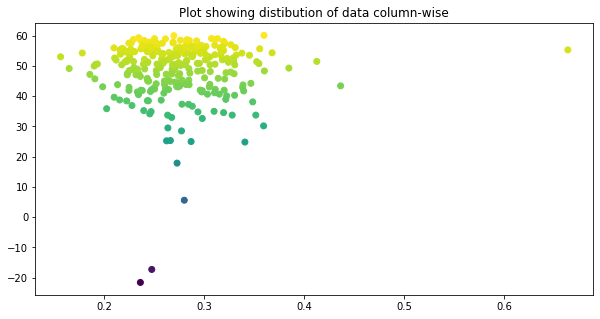

In [192]:
for i in range(29):
  plt.figure(figsize=[10,5])
  plt.scatter(X_train[:,i],log_like,c=log_like)
  plt.title("Plot showing distibution of data column-wise")   

In [185]:
threshold=25
outlier=log_like<threshold    #returns true(1) if log_like <threshold else false(0) value

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


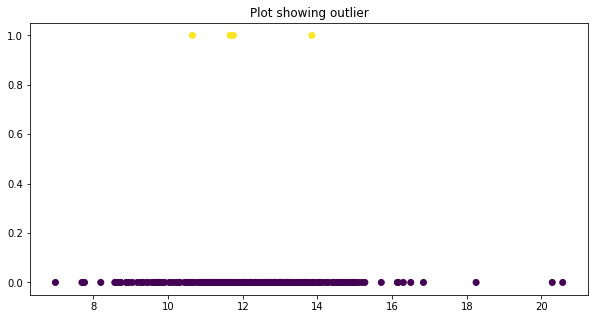

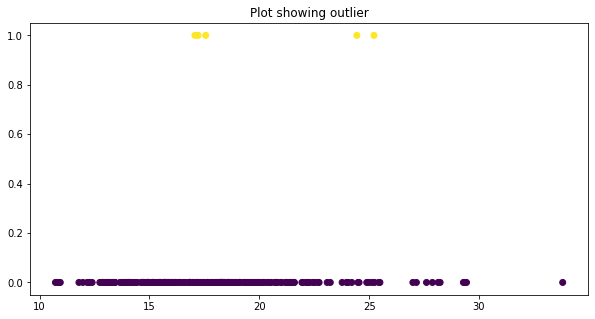

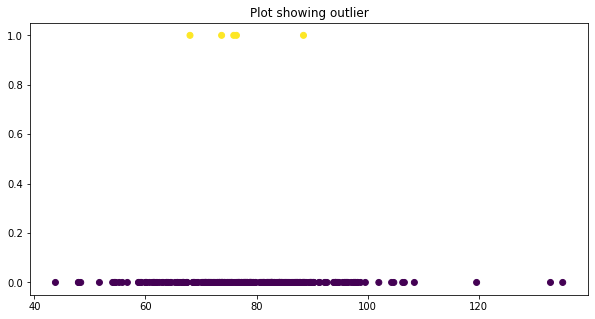

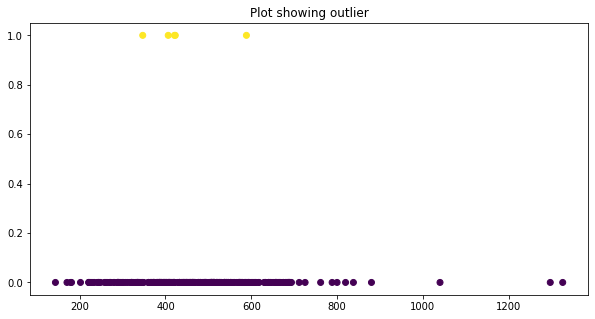

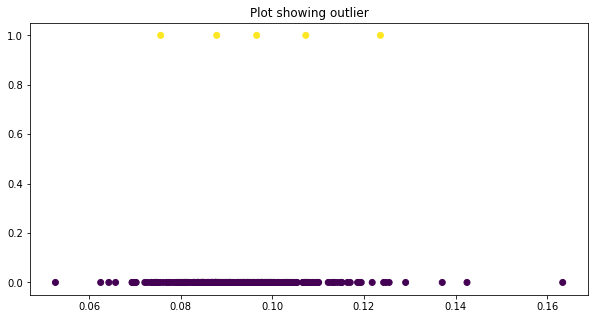

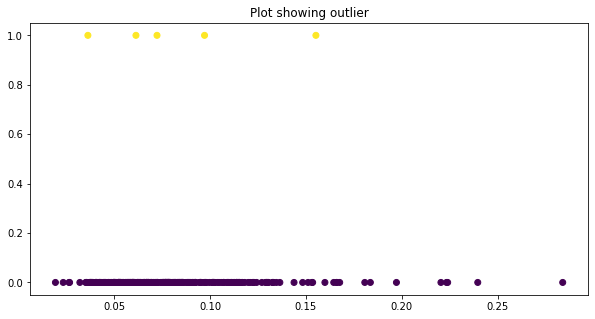

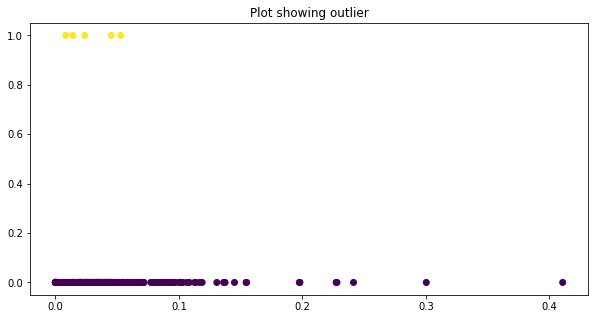

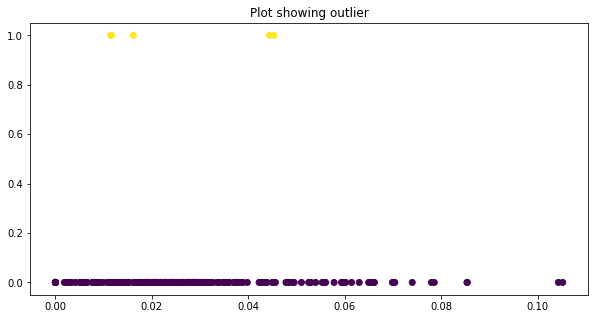

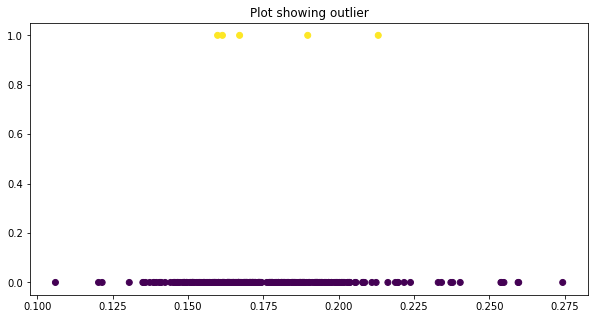

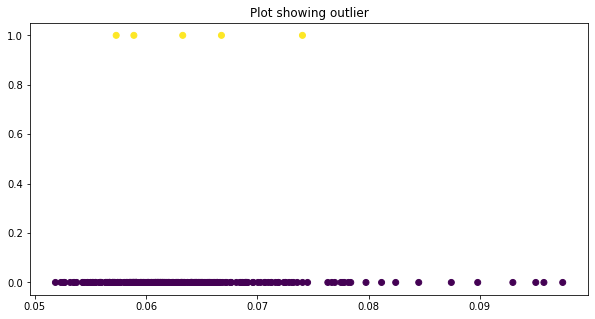

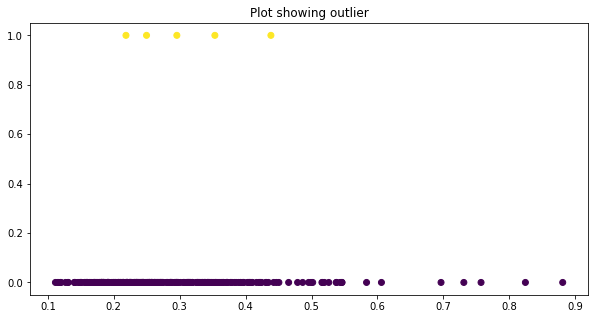

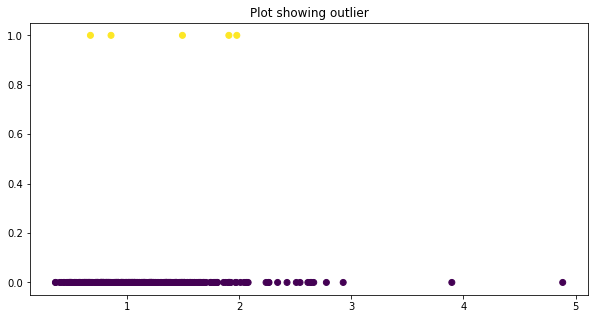

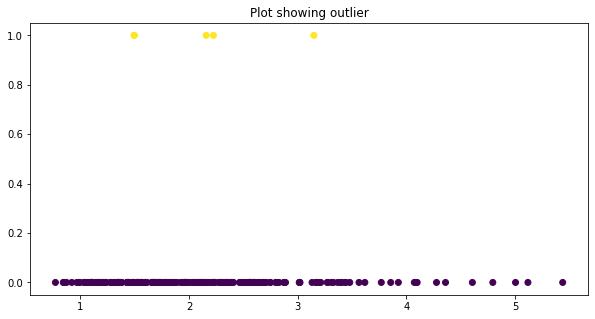

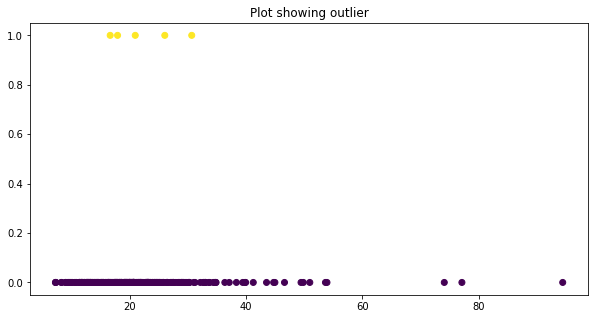

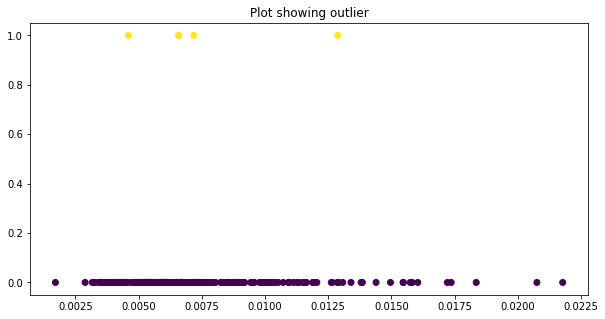

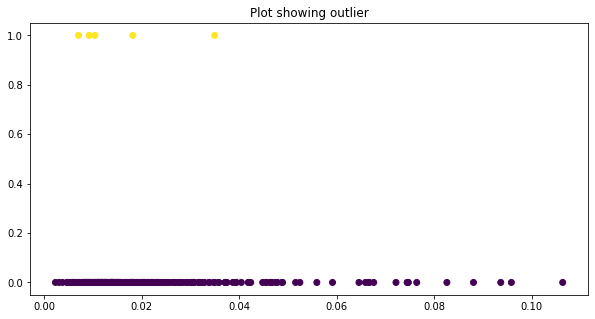

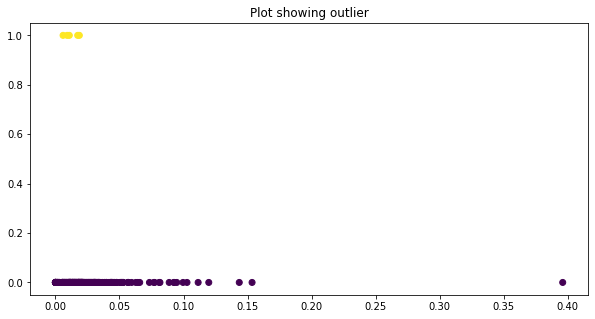

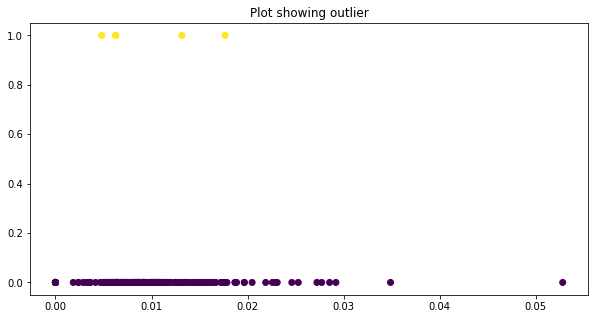

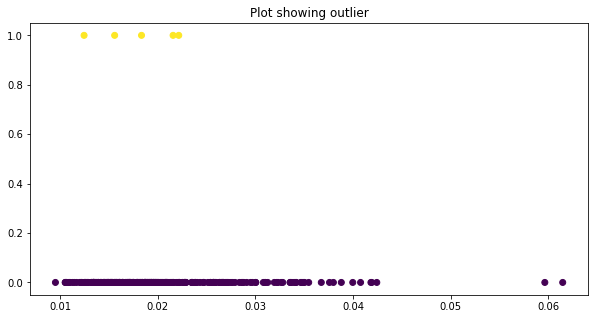

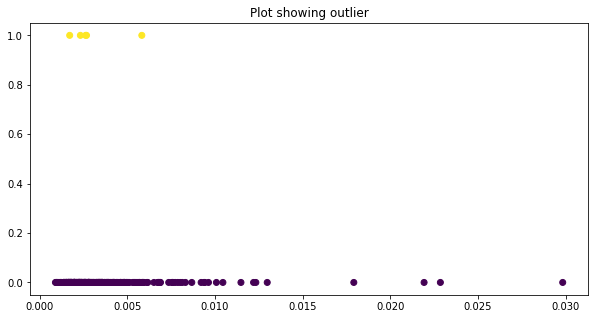

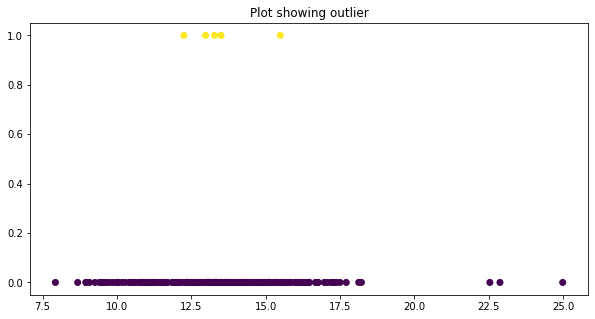

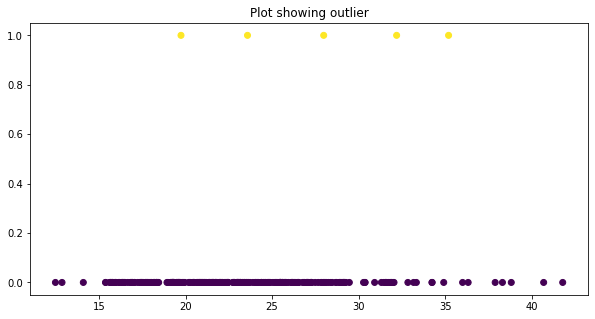

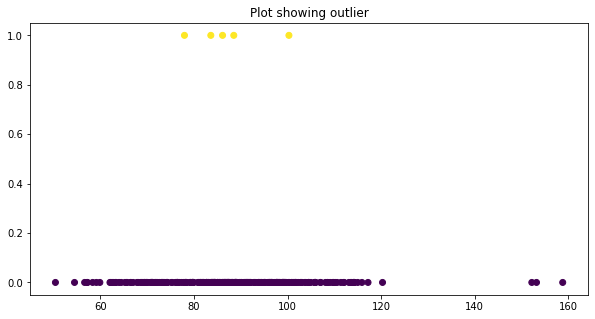

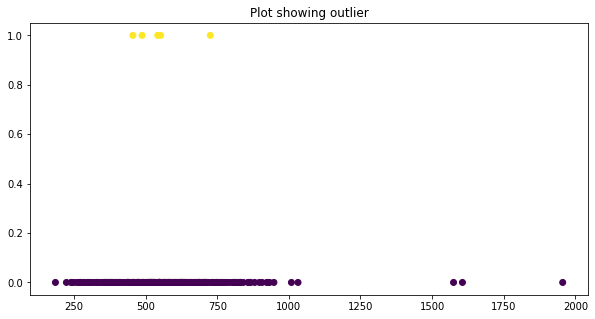

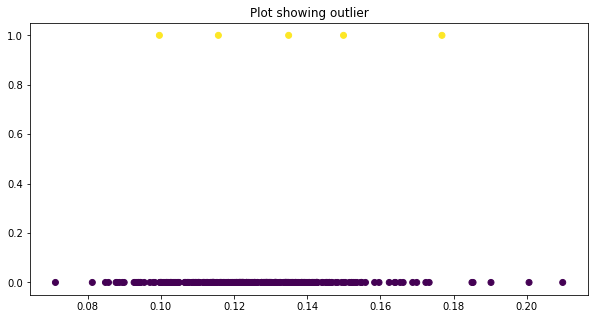

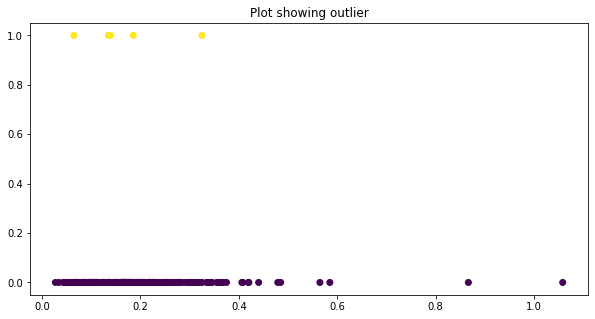

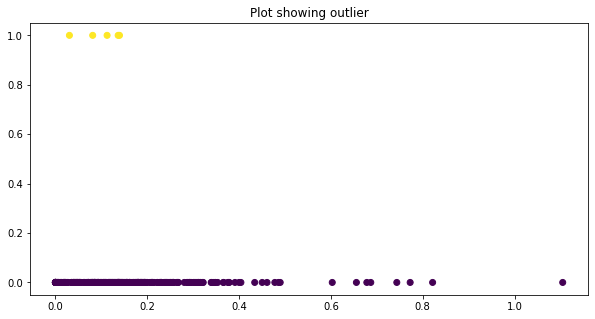

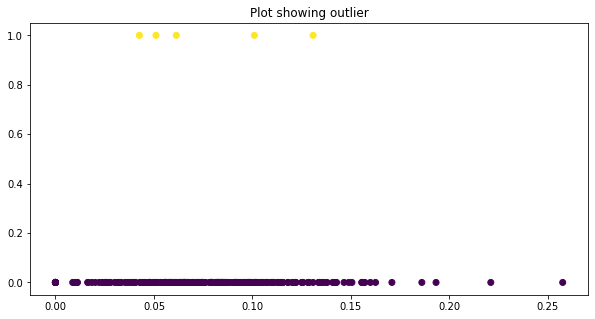

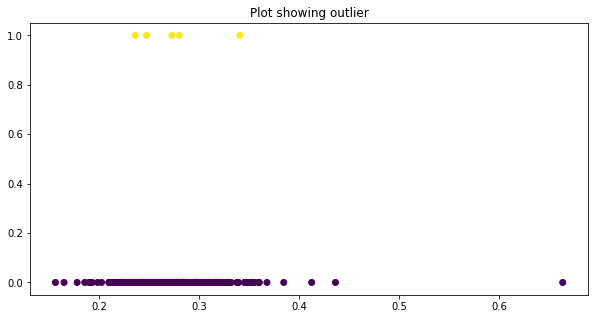

In [186]:
for i in range(29):
  plt.figure(figsize=[10,5])
  plt.scatter(X_train[:,i],outlier,c=outlier)
  plt.title("Plot showing outlier")   # only a few values( points at 1) are outliers as per set threshold and they so happen to belong to cluster 1

**USING GMM-OUTLIER DETECTOR**

In [ ]:
pip install scikit-lego

     |████████████████████████████████| 204kB 6.5MB/s 


In [ ]:
import statistics

In [167]:
from sklego.mixture import GMMOutlierDetector
mod = GMMOutlierDetector(n_components=2, threshold=10, max_iter=500, method='stddev').fit(X_train)
pred=mod.predict(X_train)
log_likeli = mod.score_samples(X_train)
statistics.stdev(log_likeli)           #used to set the threshold
pred                                 #-1 represents outliers. 1 represents inliers







array([ 1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


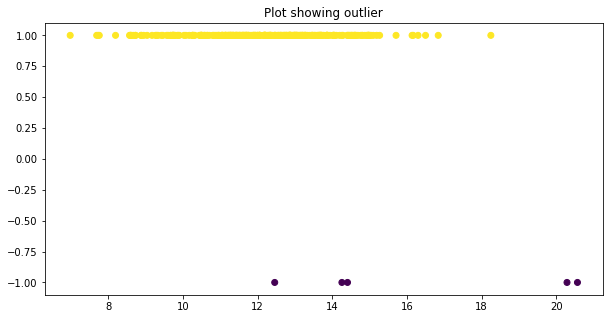

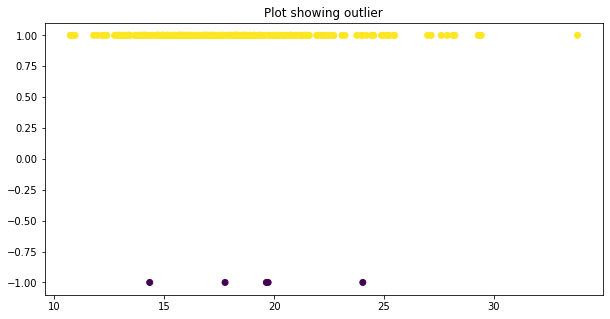

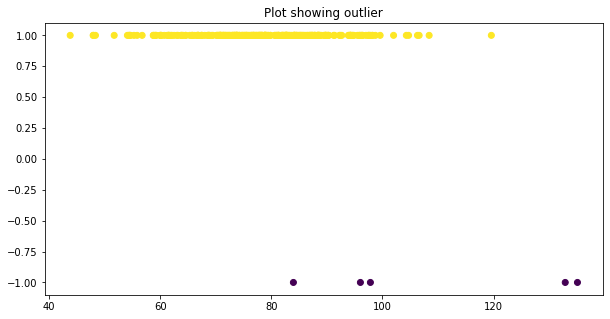

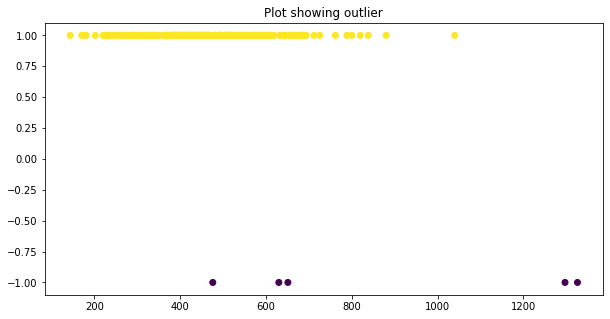

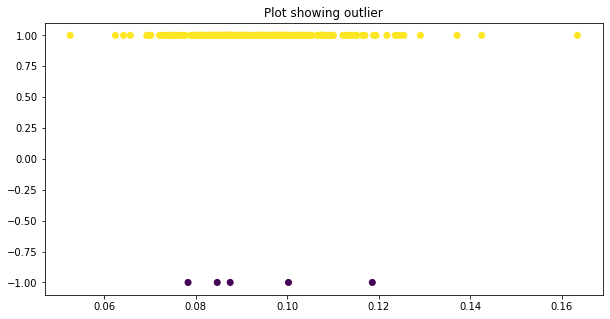

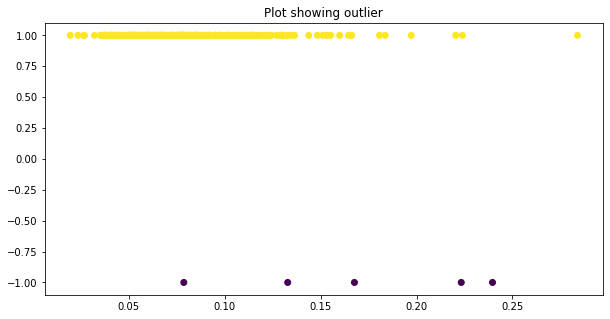

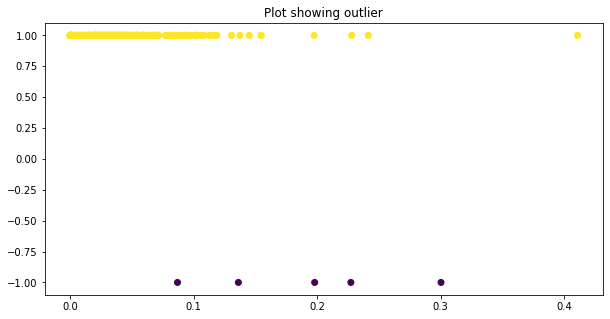

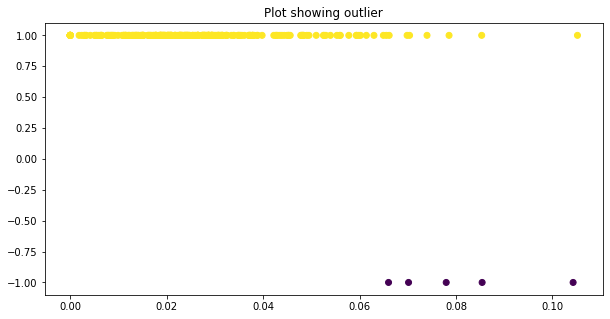

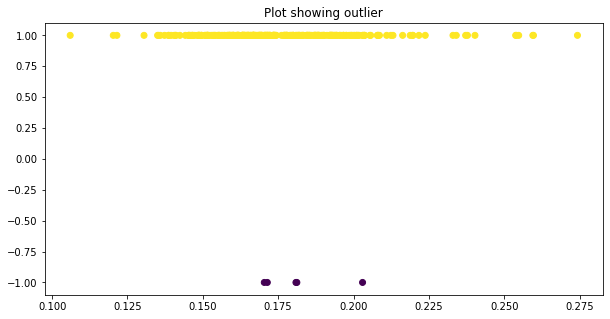

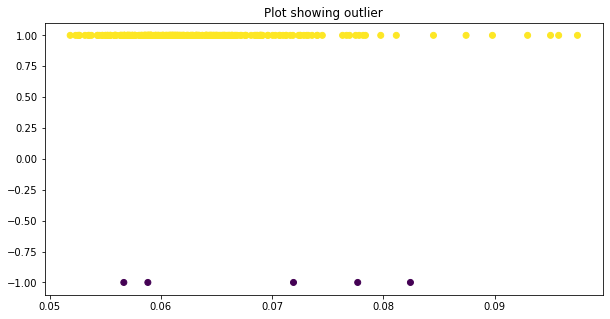

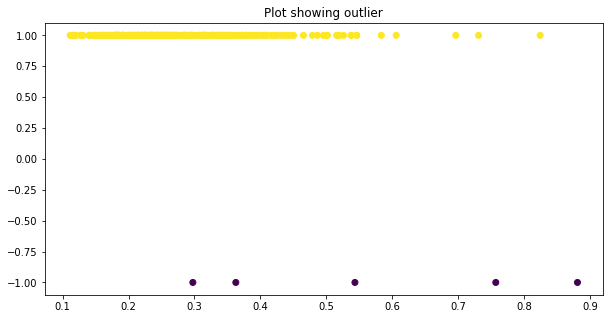

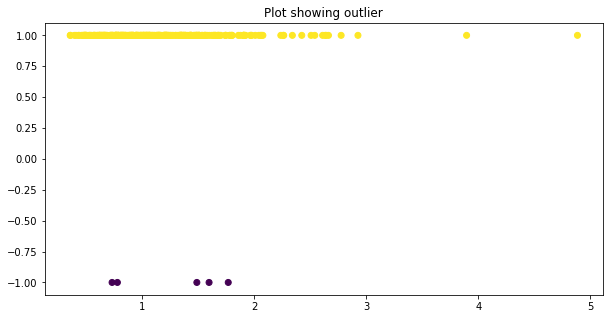

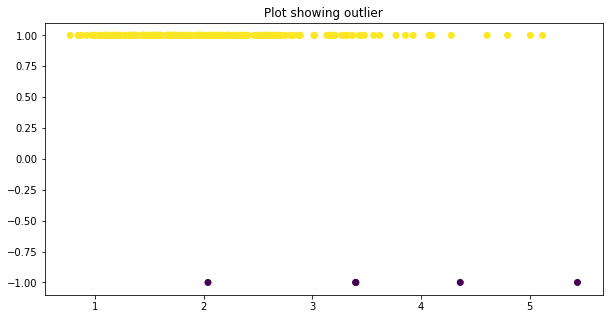

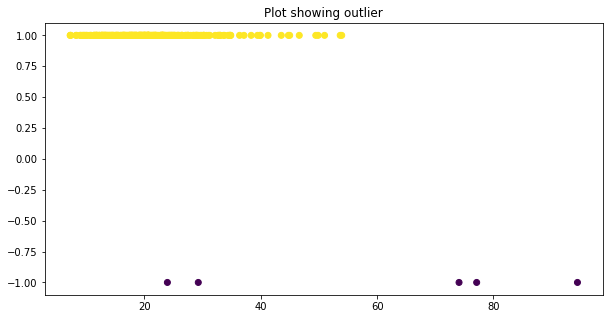

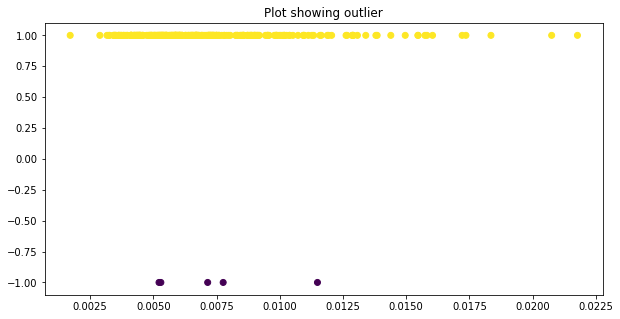

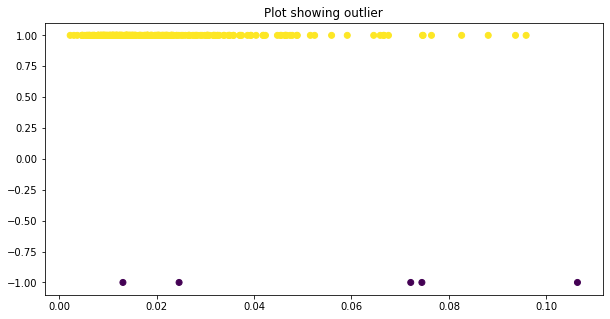

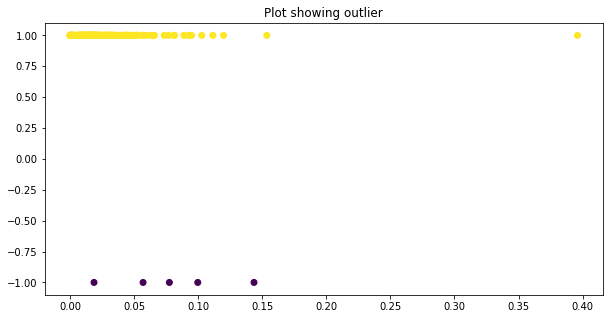

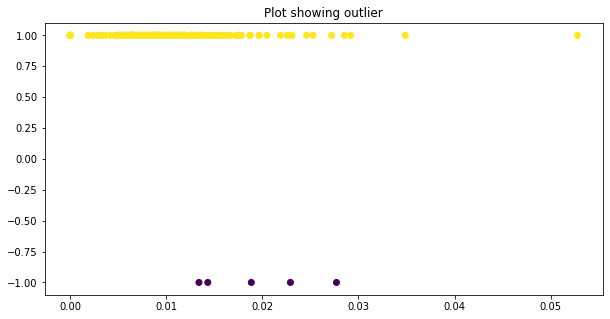

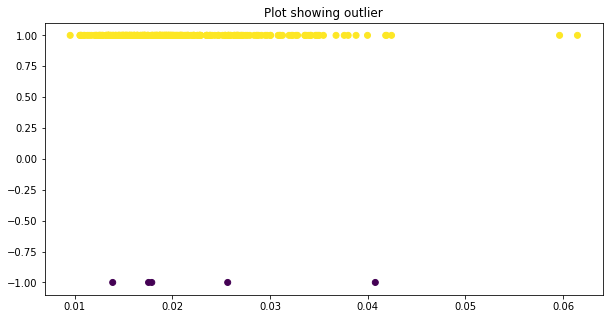

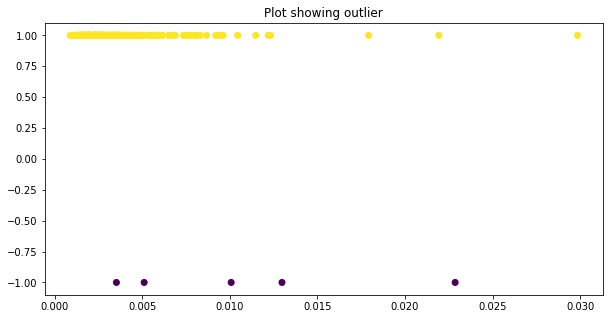

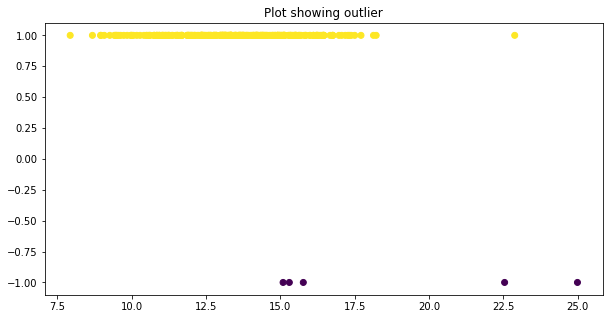

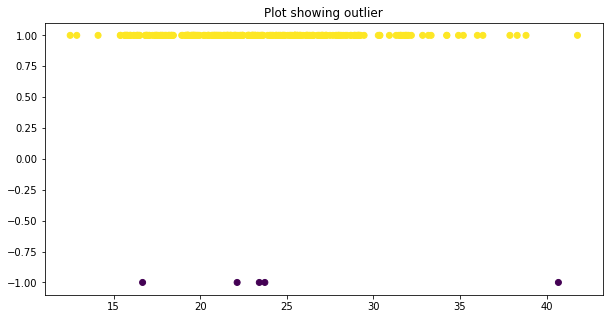

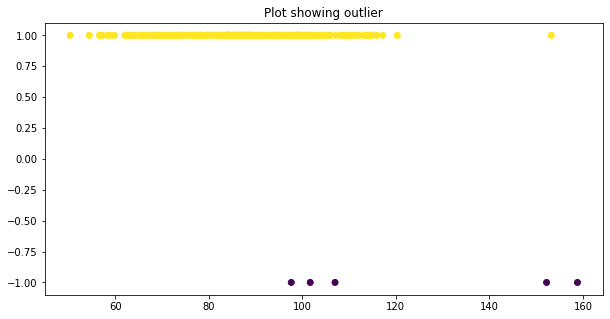

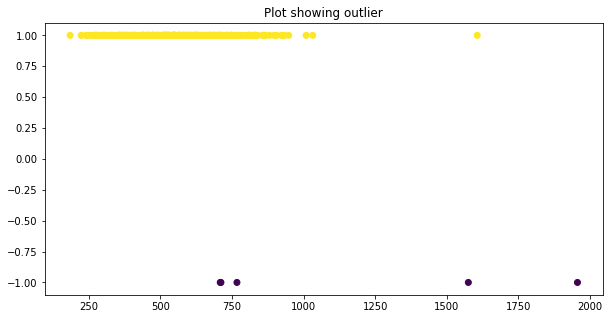

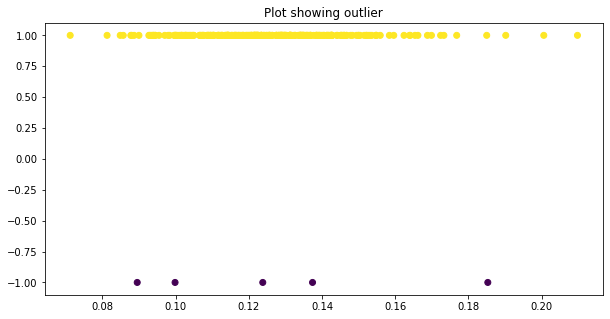

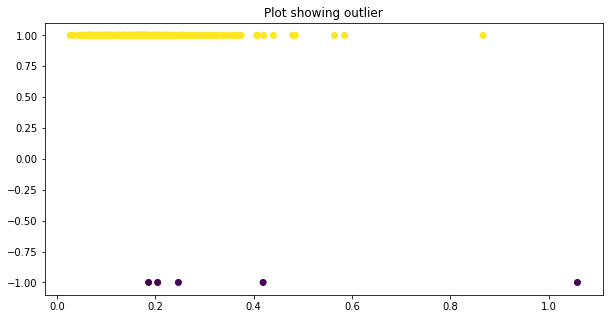

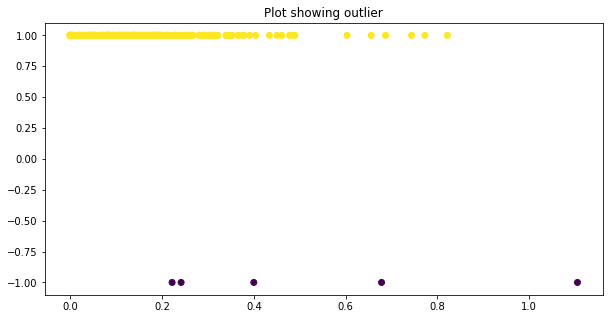

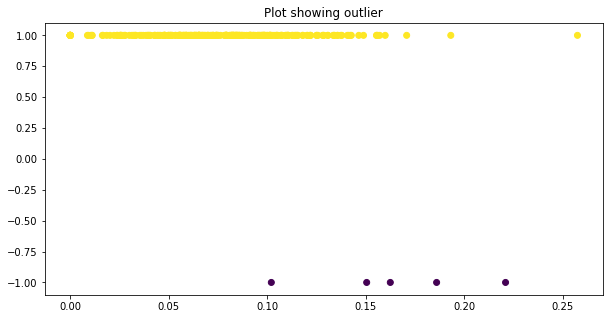

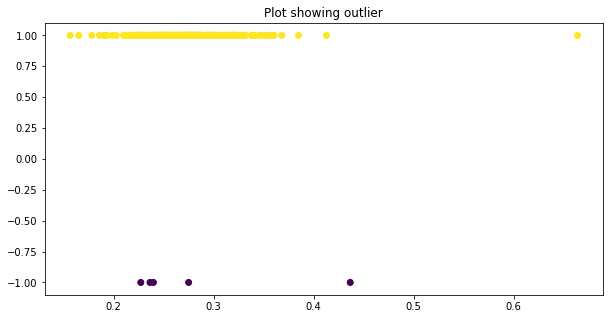

In [191]:
for i in range(29):
  plt.figure(figsize=[10,5])
  plt.scatter(X_train[:,i],pred,c=pred)
  plt.title("Plot showing outlier")
